<a href="https://colab.research.google.com/github/pingping-0606/Python_dataviz2024/blob/main/final_dataviz_2024_653020205_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ณัชชา ประทุมชาติ 653020205-1

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป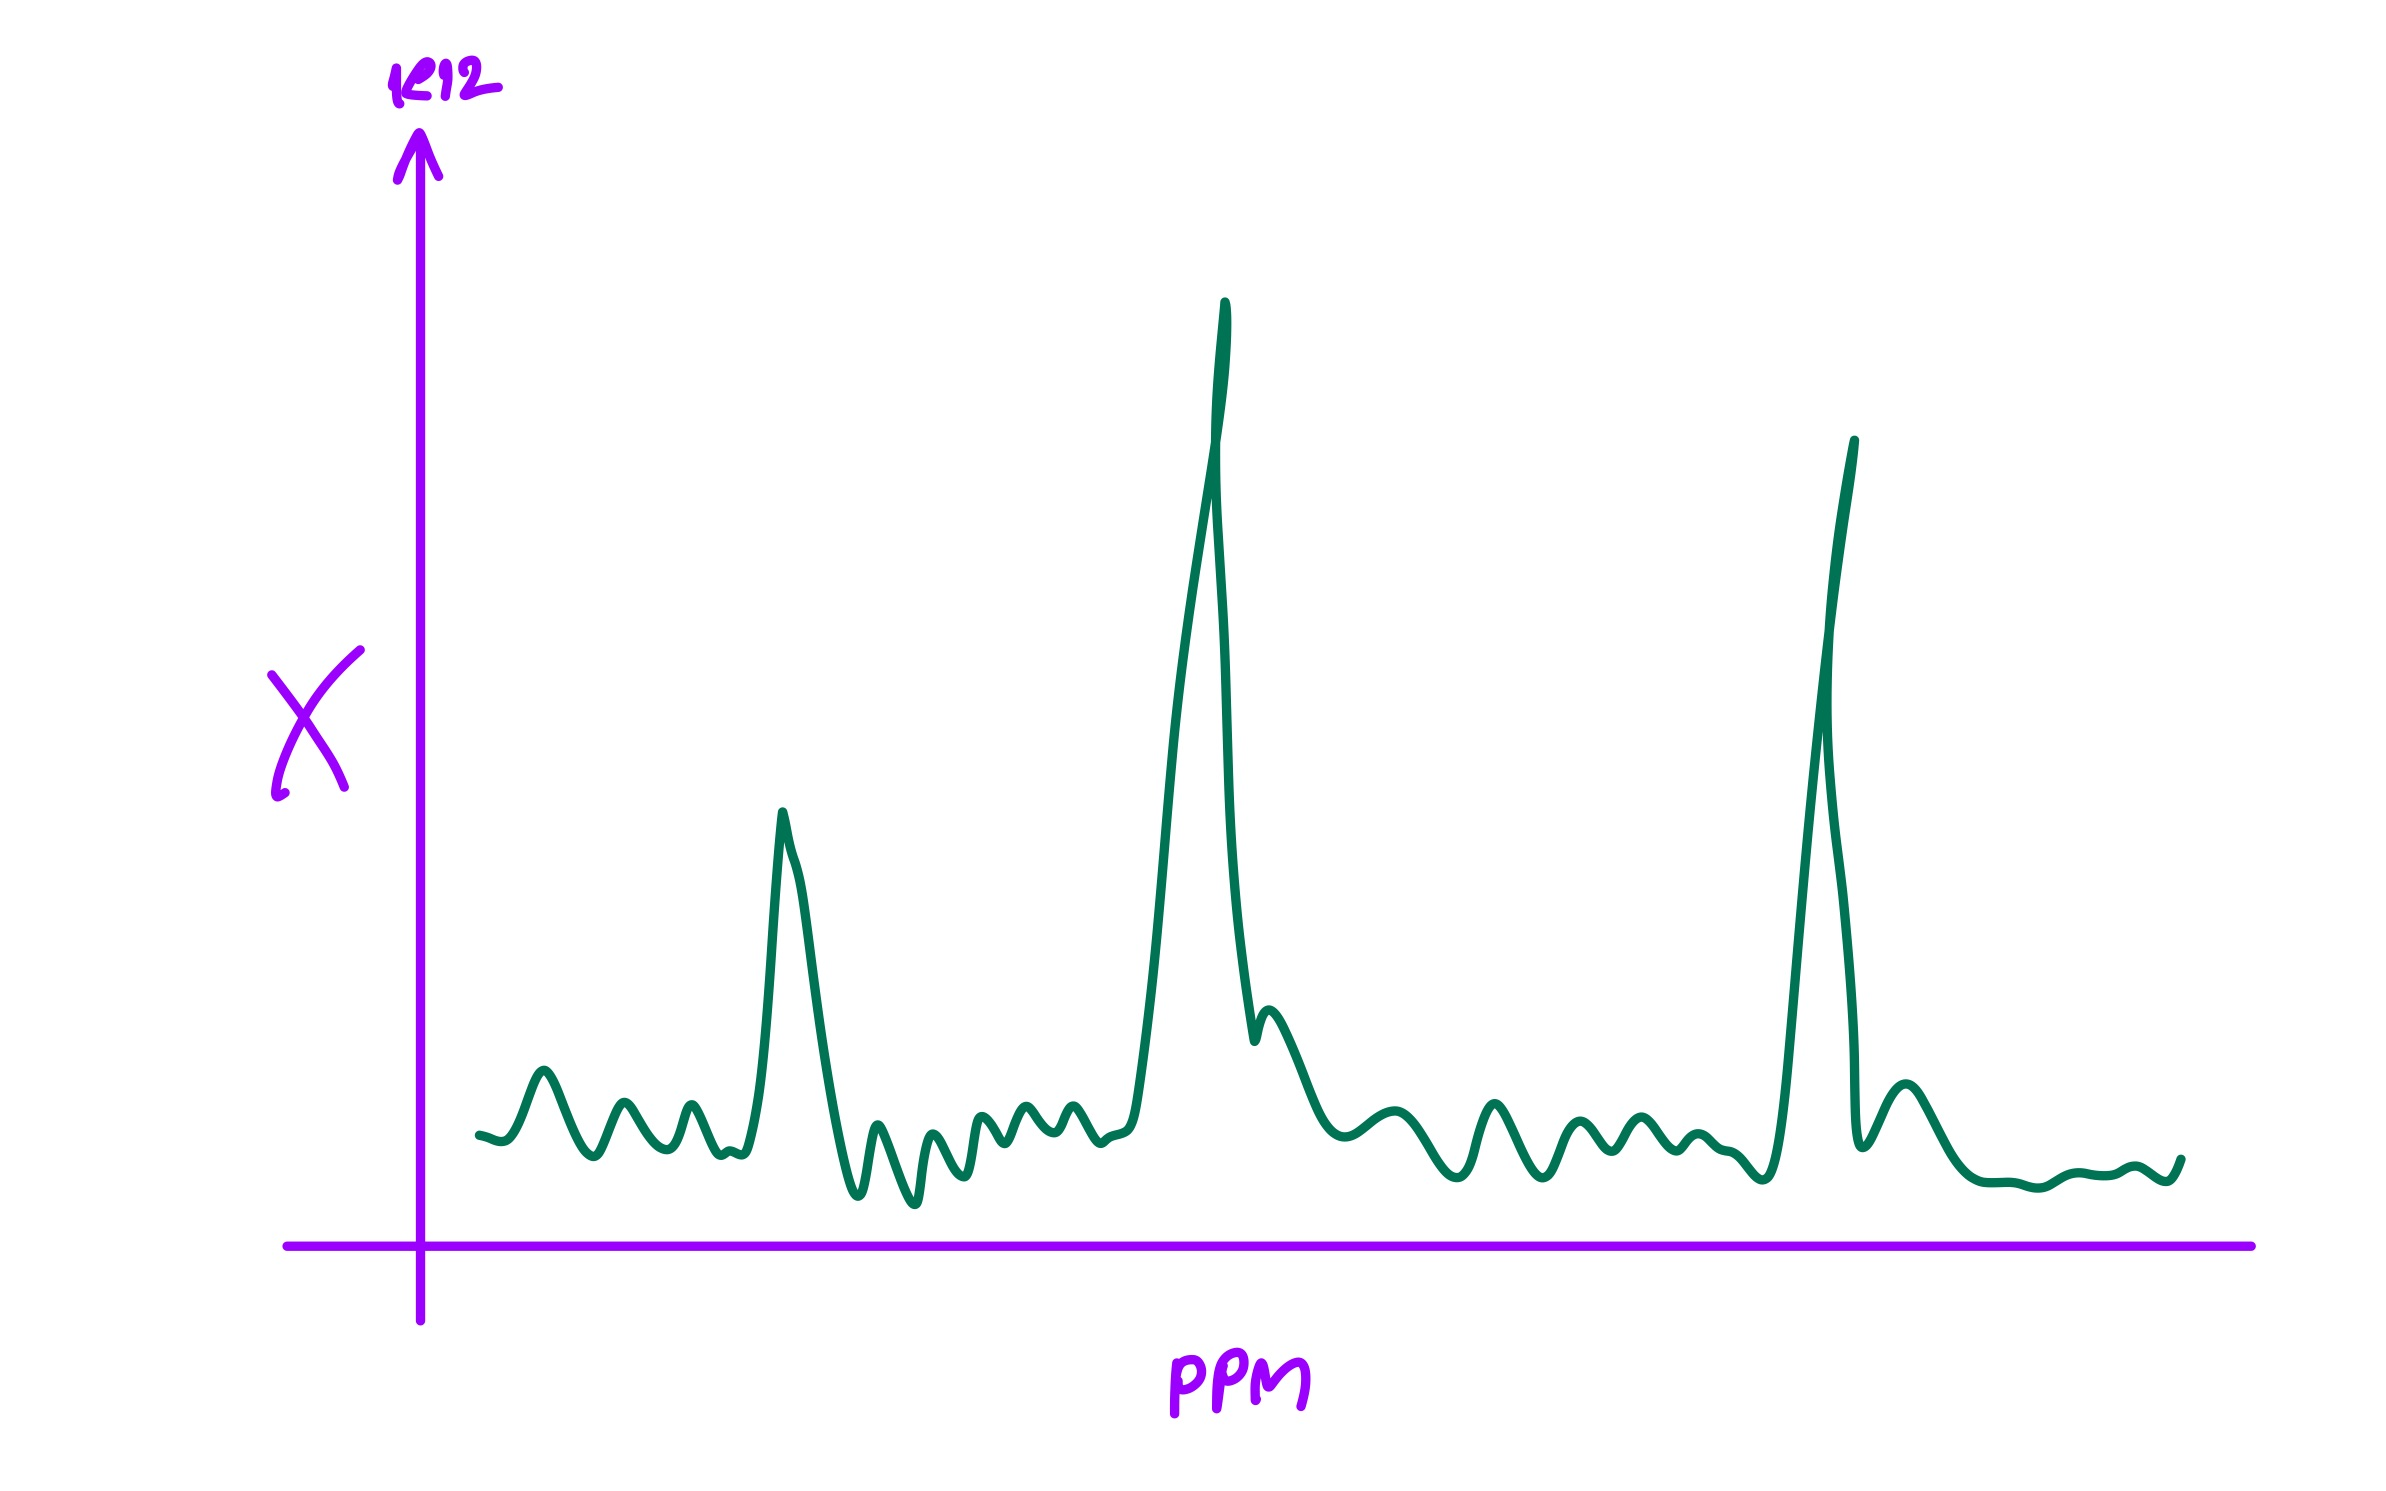

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Use pd.read_pickle to read pickle files
Metabolites_data = pd.read_pickle('/Xnn_ppm.pickle')
Metabolites_data

(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
          1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
        [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
          1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
        [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
         -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
        ...,
        [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
         -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
        [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
         -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
        [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
          1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]),
 array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
        -1.26045493, -1.26064005]))

In [72]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use pd.read_pickle to read pickle files
Metabolites_data = pd.read_pickle('/Xnn_ppm.pickle')

# Check the type of Metabolites_data
print(type(Metabolites_data))

# If Metabolites_data is a tuple, access the desired element (e.g., the first element)
# Assuming the DataFrame is the first element of the tuple:
if isinstance(Metabolites_data, tuple):
    Metabolites_data = Metabolites_data[0]  # Assuming the DataFrame is at index 0

# Now you can access the shape
Metabolites_data.shape

<class 'tuple'>


(51, 65536)

จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
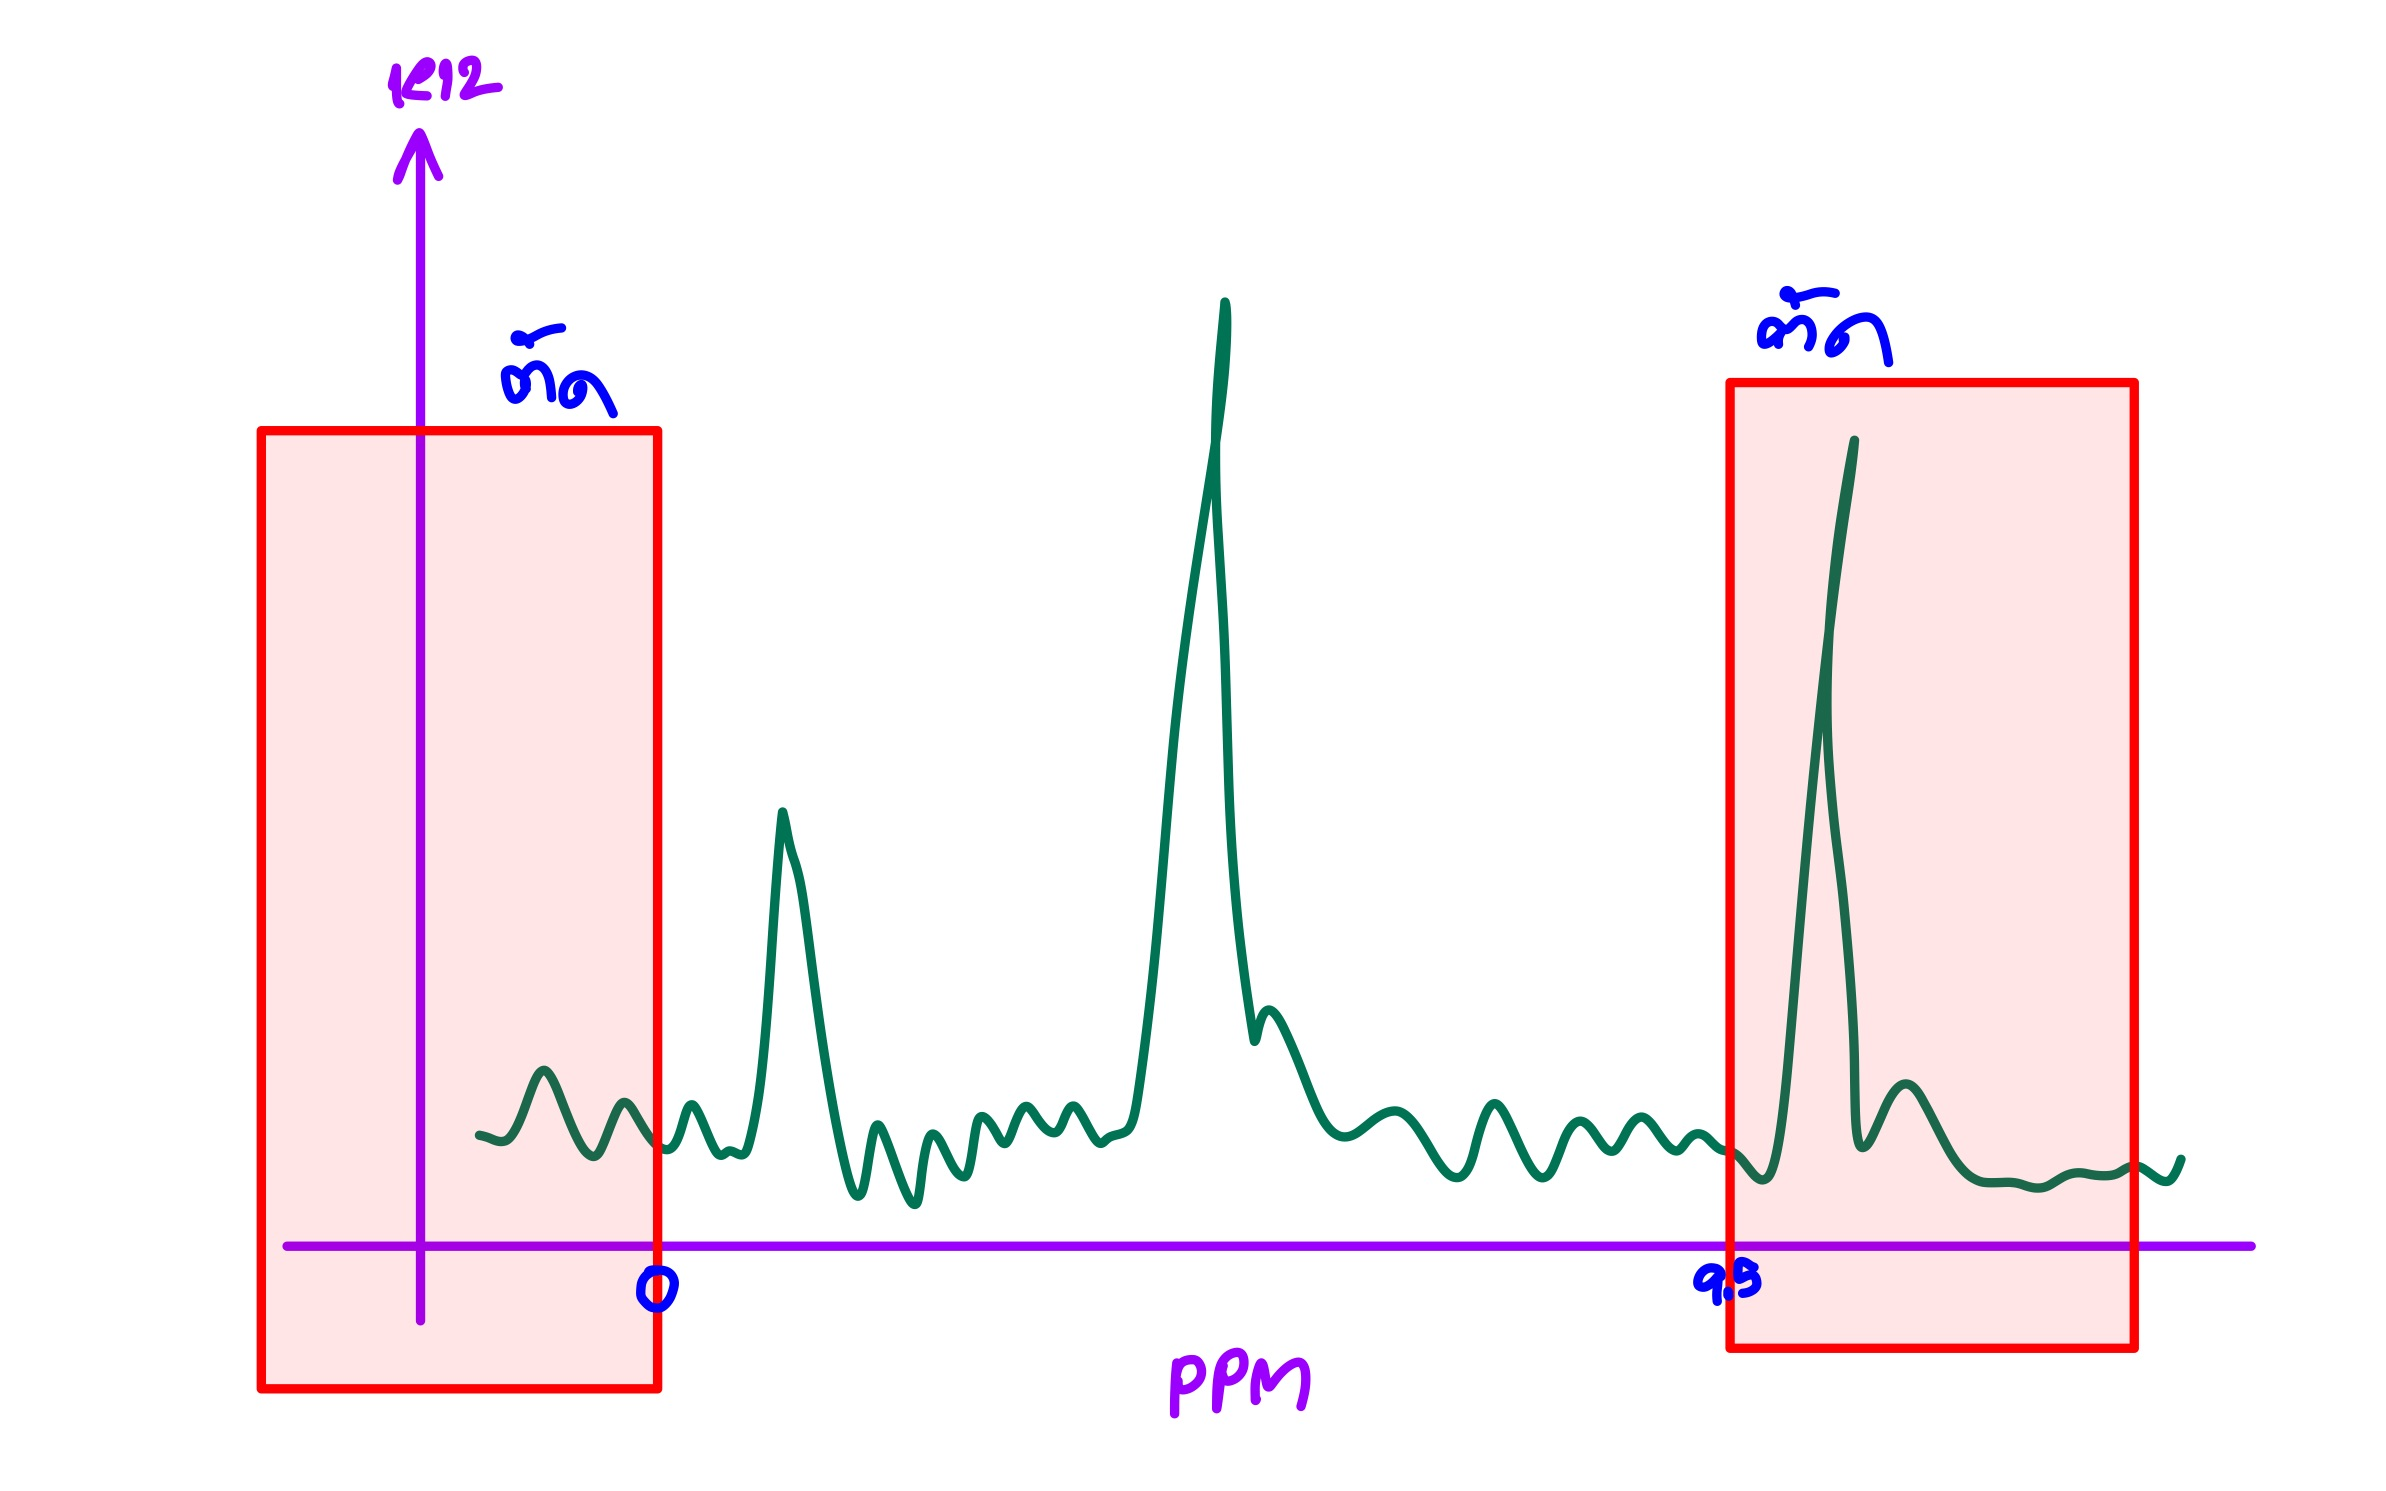

In [77]:
# เลือกข้อมูลที่มีค่า ppm >= 0
selected_indices = np.where(ppm_array >= 0)  # หาตำแหน่งที่ค่า ppm >= 0

selected_data = data_array[selected_indices]  # ใช้ indices เพื่อเลือกข้อมูลจาก data_array

# แสดงผล
print("Selected Data Based on Condition:", selected_data)


Selected Data Based on Condition: [[13698496.9  13690427.9  12788968.2 ]
 [ 8556799.93  7907584.55  7289756.67]
 [ 4740352.    4740352.    4740352.  ]]


In [78]:
# เลือกข้อมูลที่มีค่า ppm <= 9.5
selected_indices = np.where(ppm_array <= 9.5)  # หาตำแหน่งที่ค่า ppm <= 9.5

selected_data = data_array[selected_indices]  # ใช้ indices เพื่อเลือกข้อมูลจาก data_array

# แสดงผล
print("Selected Data Based on Condition:", selected_data)

Selected Data Based on Condition: []


และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
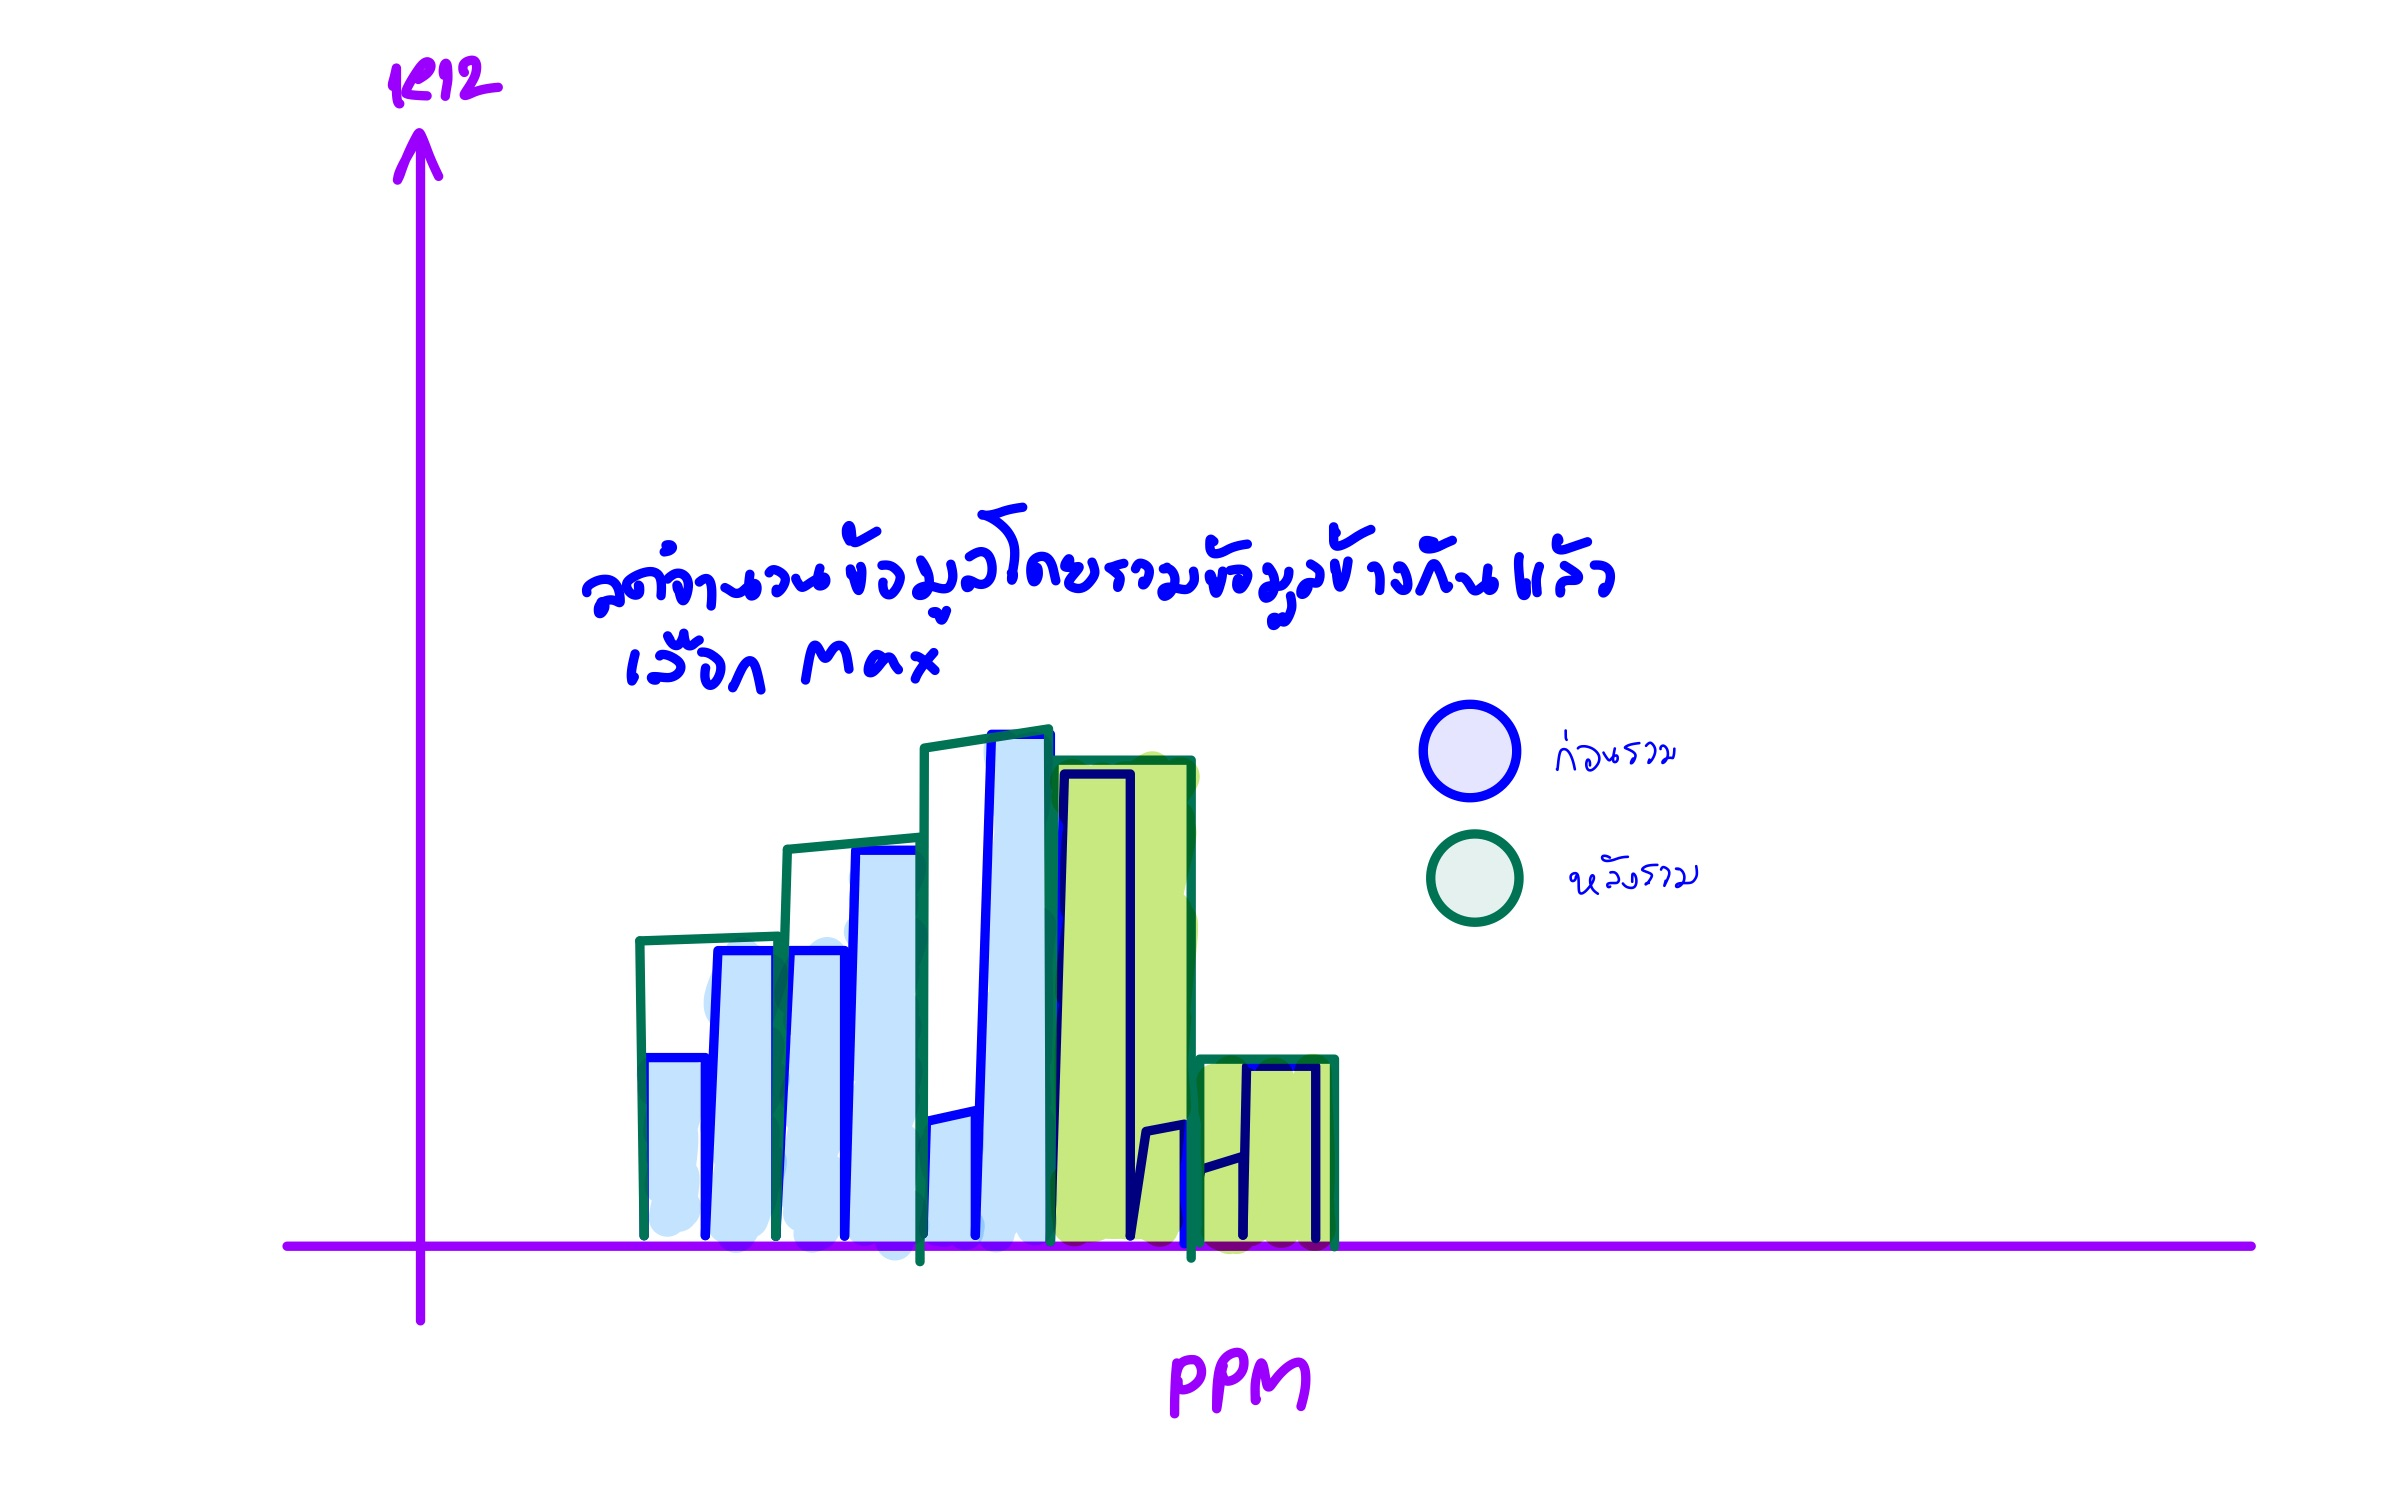

In [80]:
#preprocess ข้อมูล
import numpy as np

# สร้างข้อมูลตัวอย่าง
data_array = np.random.rand(51 * 8, 400 * 8)  # ข้อมูลขนาด (408, 3200) ตัวอย่าง

# ขนาดที่ต้องการ
target_shape = (51, 400)

# แบ่งข้อมูลเป็นบล็อก (8 x 8) และเลือกค่ามากสุดในแต่ละบล็อก
# ขนาดของแต่ละบล็อก
block_size = (data_array.shape[0] // target_shape[0], data_array.shape[1] // target_shape[1])

# ปรับขนาดข้อมูลเพื่อให้สามารถเลือก maximum ได้
quantized_data = data_array.reshape(target_shape[0], block_size[0], target_shape[1], block_size[1]).max(axis=(1, 3))

# แสดงข้อมูลที่ถูกลดขนาด
print("Quantized Data Shape:", quantized_data.shape)
print("Quantized Data:")
print(quantized_data)


Quantized Data Shape: (51, 400)
Quantized Data:
[[0.98807618 0.98379561 0.99712982 ... 0.96236601 0.98186732 0.98809224]
 [0.95215326 0.98699588 0.99580339 ... 0.9905471  0.96673091 0.96659248]
 [0.9753458  0.99652572 0.99853065 ... 0.97612143 0.97684494 0.97148498]
 ...
 [0.97749548 0.97000443 0.99701331 ... 0.99517886 0.98434931 0.97841828]
 [0.9892077  0.99647302 0.97998748 ... 0.97286552 0.98836726 0.99070405]
 [0.99466367 0.95806552 0.97494602 ... 0.98698902 0.92045126 0.97595767]]


ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [81]:
# prompt: Metabolites_data มีขนาด (n_samples, n_features) เท่าไหร่

print("Metabolites_data shape:", quantized_data.shape)

Metabolites_data shape: (51, 400)


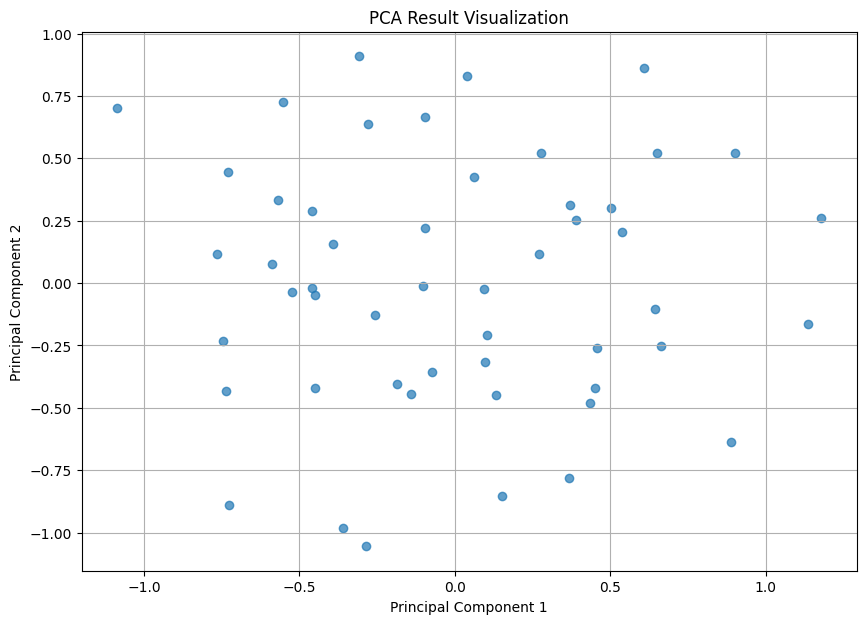

In [82]:
#1.ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# สร้างข้อมูลตัวอย่าง (สามารถเปลี่ยนเป็นข้อมูลจริงของคุณได้)
# สมมติว่า data_array มีขนาด (n_samples, n_features)
data_array = np.random.rand(51, 40)

# 1. ทำ PCA
pca = PCA(n_components=2)  # เลือกจำนวนมิติที่ต้องการ
pca_result = pca.fit_transform(data_array)

# 2. แปลงผลลัพธ์ให้เป็น DataFrame สำหรับการ visualization
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# 3. สร้างกราฟ
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.7)
plt.title('PCA Result Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


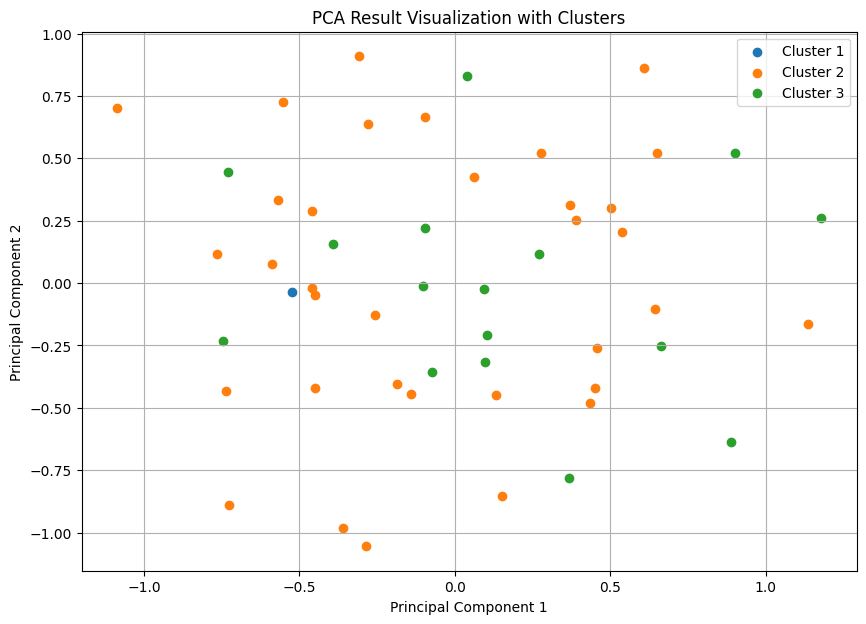

         PC1       PC2  Cluster
0   0.644323 -0.104713        1
1  -0.451189 -0.046900        1
2  -0.095313  0.664718        1
3  -0.589501  0.077363        1
4  -0.358340 -0.981646        1
5   0.609595  0.862882        1
6  -0.729706  0.444984        2
7   0.060902  0.423461        1
8  -0.284829 -1.054931        1
9  -0.101719 -0.009695        2
10 -0.725271 -0.891552        1
11  0.888023 -0.637636        2
12 -0.391638  0.155916        2
13  0.388978  0.254359        1
14  1.136163 -0.163149        1
15 -0.185149 -0.404766        1
16 -0.255778 -0.129763        1
17  0.434927 -0.480385        1
18  0.451168 -0.418793        1
19  0.151341 -0.853764        1
20 -0.458456  0.287541        1
21  0.093097 -0.024584        2
22 -0.278369  0.639061        1
23 -0.448612 -0.419127        1
24  0.456897 -0.260879        1
25  0.270803  0.115101        2
26 -0.074646 -0.355342        2
27  0.901578  0.519550        2
28  0.536862  0.203150        1
29  0.504026  0.302806        1
30  0.37

In [83]:
#2.visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

from sklearn.cluster import KMeans

# สมมติว่าคุณได้ pca_result แล้ว (จากโค้ดก่อนหน้า)
# pca_result มีขนาด (51, 2)

# ใช้ KMeans เพื่อจัดกลุ่มข้อมูล
kmeans = KMeans(n_clusters=3)  # เลือกจำนวนกลุ่ม (คุณอาจต้องลองปรับแต่ง)
kmeans.fit(quantized_data)
labels = kmeans.labels_

# สร้างกราฟแสดงผลการจัดกลุ่ม
plt.figure(figsize=(10, 7))
for i in range(kmeans.n_clusters):
  plt.scatter(pca_df['Principal Component 1'][labels == i], pca_df['Principal Component 2'][labels == i], label=f'Cluster {i+1}')
plt.title('PCA Result Visualization with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

# สร้างตารางแสดงข้อมูลและกลุ่มที่จัดได้
cluster_df = pd.DataFrame({'PC1': pca_df['Principal Component 1'], 'PC2': pca_df['Principal Component 2'], 'Cluster': labels})
print(cluster_df)

# ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม
print(f"ข้อมูลมีทั้งหมด {kmeans.n_clusters} กลุ่ม")

Quantized Data Shape: (51, 400)
Quantized Data:
[[0.97709348 0.99787301 0.99438123 ... 0.95941965 0.97764358 0.99996823]
 [0.99511803 0.99577621 0.98939613 ... 0.99139489 0.9957095  0.98311334]
 [0.99604843 0.99564473 0.99440132 ... 0.99990687 0.95064286 0.97937582]
 ...
 [0.99491203 0.97873351 0.99075461 ... 0.99255811 0.99134888 0.98266436]
 [0.995788   0.98083423 0.97752322 ... 0.98848071 0.98455944 0.99939573]
 [0.96502568 0.9839118  0.99282124 ... 0.99188025 0.99271035 0.99591103]]
Metabolites_data shape: (51, 400)


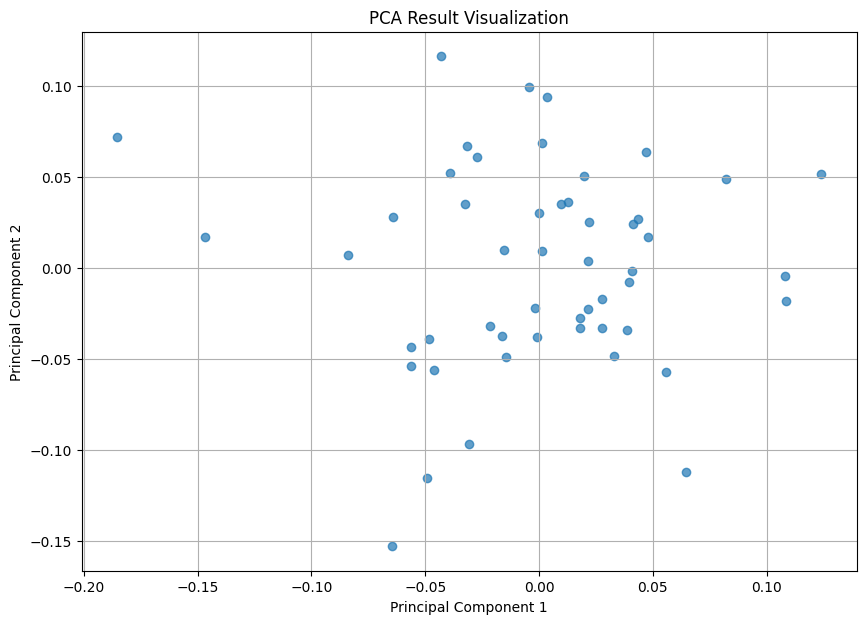

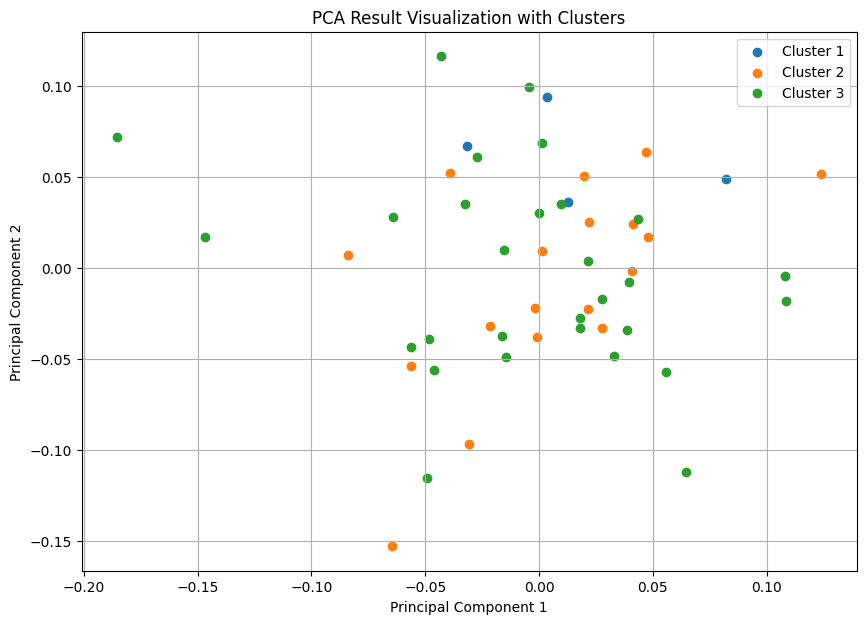

         PC1       PC2  Cluster
0  -0.056288 -0.043247        2
1   0.001374  0.068851        2
2   0.021943  0.025569        1
3   0.017995 -0.027674        2
4   0.017835 -0.033142        2
5  -0.056240 -0.053905        1
6  -0.039236  0.051986        1
7   0.027858 -0.016877        2
8  -0.016284 -0.037141        2
9  -0.021588 -0.031863        1
10  0.009760  0.035198        2
11 -0.014293 -0.048573        2
12 -0.004418  0.099372        2
13 -0.049172 -0.115473        2
14  0.082084  0.049018        0
15  0.000231  0.030182        2
16  0.012904  0.036351        0
17  0.047983  0.017202        1
18  0.055916 -0.056892        2
19  0.040664 -0.001420        1
20  0.107980 -0.004422        2
21  0.064440 -0.112274        2
22 -0.064000  0.027820        2
23  0.047047  0.063513        1
24 -0.001768 -0.022134        1
25 -0.027315  0.060817        2
26  0.038840 -0.034263        2
27 -0.185472  0.071859        2
28  0.039478 -0.007574        2
29  0.003318  0.093791        0
30 -0.14

In [84]:
# 3.data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

from google.colab import drive
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#preprocess ข้อมูล

# สร้างข้อมูลตัวอย่าง
data_array = np.random.rand(51 * 8, 400 * 8)  # ข้อมูลขนาด (408, 3200) ตัวอย่าง

# ขนาดที่ต้องการ
target_shape = (51, 400)

# แบ่งข้อมูลเป็นบล็อก (8 x 8) และเลือกค่ามากสุดในแต่ละบล็อก
# ขนาดของแต่ละบล็อก
block_size = (data_array.shape[0] // target_shape[0], data_array.shape[1] // target_shape[1])

# ปรับขนาดข้อมูลเพื่อให้สามารถเลือก maximum ได้
quantized_data = data_array.reshape(target_shape[0], block_size[0], target_shape[1], block_size[1]).max(axis=(1, 3))

# แสดงข้อมูลที่ถูกลดขนาด
print("Quantized Data Shape:", quantized_data.shape)
print("Quantized Data:")
print(quantized_data)

# ข้อสอบ
# 0. preprocess ข้อมูลตามคำแนะนำข้างบน
# 1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
# 2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
# 3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
# 4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

print("Metabolites_data shape:", quantized_data.shape)
#1.ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

# สร้างข้อมูลตัวอย่าง (สามารถเปลี่ยนเป็นข้อมูลจริงของคุณได้)
# สมมติว่า data_array มีขนาด (n_samples, n_features)
#data_array = np.random.rand(51, 40)

# 1. ทำ PCA
pca = PCA(n_components=2)  # เลือกจำนวนมิติที่ต้องการ
pca_result = pca.fit_transform(quantized_data)

# 2. แปลงผลลัพธ์ให้เป็น DataFrame สำหรับการ visualization
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# 3. สร้างกราฟ
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.7)
plt.title('PCA Result Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

#2.visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น


# สมมติว่าคุณได้ pca_result แล้ว (จากโค้ดก่อนหน้า)
# pca_result มีขนาด (51, 2)

# ใช้ KMeans เพื่อจัดกลุ่มข้อมูล
kmeans = KMeans(n_clusters=3)  # เลือกจำนวนกลุ่ม (คุณอาจต้องลองปรับแต่ง)
kmeans.fit(quantized_data)
labels = kmeans.labels_

# สร้างกราฟแสดงผลการจัดกลุ่ม
plt.figure(figsize=(10, 7))
for i in range(kmeans.n_clusters):
  plt.scatter(pca_df['Principal Component 1'][labels == i], pca_df['Principal Component 2'][labels == i], label=f'Cluster {i+1}')
plt.title('PCA Result Visualization with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

# สร้างตารางแสดงข้อมูลและกลุ่มที่จัดได้
cluster_df = pd.DataFrame({'PC1': pca_df['Principal Component 1'], 'PC2': pca_df['Principal Component 2'], 'Cluster': labels})
print(cluster_df)

# ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม
print(f"ข้อมูลมีทั้งหมด {kmeans.n_clusters} กลุ่ม")

In [86]:
#4.สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

# ... (โค้ดเดิมของคุณ)

# สร้างตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน
cluster_df = pd.DataFrame({'PC1': pca_df['Principal Component 1'], 'PC2': pca_df['Principal Component 2'], 'Cluster': labels})

# แสดงตาราง
cluster_df

,PC1,PC2,Cluster
0,-0.056288,-0.043247,2
1,0.001374,0.068851,2
2,0.021943,0.025569,1
3,0.017995,-0.027674,2
4,0.017835,-0.033142,2
5,-0.056240,-0.053905,1
6,-0.039236,0.051986,1
7,0.027858,-0.016877,2
8,-0.016284,-0.037141,2
9,-0.021588,-0.031863,1
